In [1]:
#import tensorflow
import tensorflow 

In [2]:
#import tensorflow inbuilt data set 
from tensorflow.keras.datasets import fashion_mnist

In [3]:
#create object and load the dataset 
data = fashion_mnist.load_data()

In [4]:
#split data to train and test (orignally it has done we are only asign here)
(train), (test) = data

In [5]:
x_train, y_train = train
x_test, y_test = test

In [6]:
print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_test: {}".format(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [7]:
#get name function to get the name of the cloths 
class_names=['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
    '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
def get_name(n):
    name = class_names[n]
    return name

9 Ankle boot


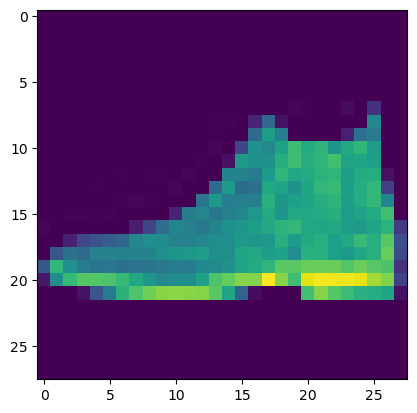

In [8]:
import matplotlib.pyplot as plt 
plt.imshow(x_test[0])
print(get_name(y_test[0]))

In [9]:
x_test[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  24, 173, 222, 224, 206,
        180, 235, 175, 185, 233, 233, 149,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  22, 139, 242, 215, 252, 229, 211,
        112,   0,  52, 139, 228, 248, 202, 211, 158,  17,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   0, 143, 230, 229, 208, 197, 242, 224, 214,
        234, 186, 255, 234, 223, 235, 199, 211, 237, 219,  48,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 133, 216, 219, 205, 205, 185, 216, 202, 186,
        180, 199, 192, 225, 238, 182, 197, 222, 220, 208, 194,  29,   0,
          1,   0],
       [  0,   3,   0,  26, 214, 186, 208, 206, 209, 202, 194, 206, 195,
        173, 185, 181, 224, 177, 199, 195, 199, 215, 182, 208, 186,   0,
          0,   0],
       [  0,   7,   0, 126, 211, 185, 214, 215, 211, 213, 209, 197, 196,
        224, 200, 211, 194, 210, 222, 227, 232, 218, 185, 191, 199,   7,
          0,   0],
       [  

In [10]:
#normalized data 
x_train = x_train/255
x_test = x_test/255

In [11]:
#check the new min and max of the normalized data set
import numpy as np 
np.min(x_test[20])

0.0

In [12]:
#reshape to vectors 
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_test.shape

(10000, 784)

In [15]:
#load the model
from tensorflow.keras.models import Sequential
model = Sequential()

In [16]:
x_train[1].shape

(784,)

In [17]:
#import layers (Dense)  and Droupout Regularization" 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#kernal regularization
from tensorflow.keras.regularizers import l1_l2
#l1 regularization parameter 
l1_reg=0.001

#l2 regularization parameter 
l2_reg= 0.001


model.add(Dense(units=256, activation='relu', input_shape=(784, ), kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.4))
model.add(Dense(units=512, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.2))
model.add(Dense(units=68, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.1))

model.add(Dense(units=10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [19]:
#compile model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [ ]:
#early stoping
from tensorflow.keras.callbacks import EarlyStopping
early_stoping_callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

#model fit
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=50, verbose=1, callbacks=[early_stoping_callbacks])

Epoch 1/50


2023-12-10 12:44:28.937722: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1199/1200 [============================>.] - ETA: 0s - loss: 3.1595 - sparse_categorical_accuracy: 0.5506

In [ ]:
#extract accuray and the loss from the history object 
train_accuracy = history.history['sparse_categorical_accuracy']
test_accuracy = history.history['val_sparse_categorical_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

#create the range base on number od executed epochs 
epochs = range(1, len(train_accuracy)+1)



In [ ]:

#plot the accuray curve
plt.figure(figsize=(5,5))
plt.plot(epochs, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Test Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:

#plot the loss curve 
plt.figure(figsize=(5,5))
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, test_loss, 'r', label='Test Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("loss: {}".format(loss))
print("accuracy: {}".format(accuracy))

In [ ]:
#model predictions 

predicttion = model.predict(x_test)

In [ ]:
predicttion_values = np.argmax(predicttion, axis=1)
predicttion_values

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

print("accuracy: {}".format(accuracy_score(predicttion_values, y_test)))

print("precision: {}".format(precision_score(y_test, predicttion_values, average=None)))
print("recall: {}".format(recall_score(predicttion_values, y_test, average=None)))


In [ ]:
cm = confusion_matrix(predicttion_values, y_test)
import seaborn as sns

plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Y_test")
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.show()